# Trend and Seasonality with Python

In [2]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load data and preparation

In [11]:
temperatures = pd.read_csv('./monthly_csv.csv')
temperatures['Date'] = pd.to_datetime(temperatures['Date'])

In [12]:
temperatures.head()

,Source,Date,Mean
0,GCAG,2016-12-06,0.7895
1,GISTEMP,2016-12-06,0.8100
2,GCAG,2016-11-06,0.7504
3,GISTEMP,2016-11-06,0.9300
4,GCAG,2016-10-06,0.7292


In [13]:
temperatures = temperatures.pivot(index='Date', columns='Source', values='Mean')
temperatures.head()

Source,GCAG,GISTEMP
Date,,
1880-01-06,0.0009,-0.30
1880-02-06,-0.1229,-0.21
1880-03-06,-0.1357,-0.18
1880-04-06,-0.0499,-0.27
1880-05-06,-0.0738,-0.14


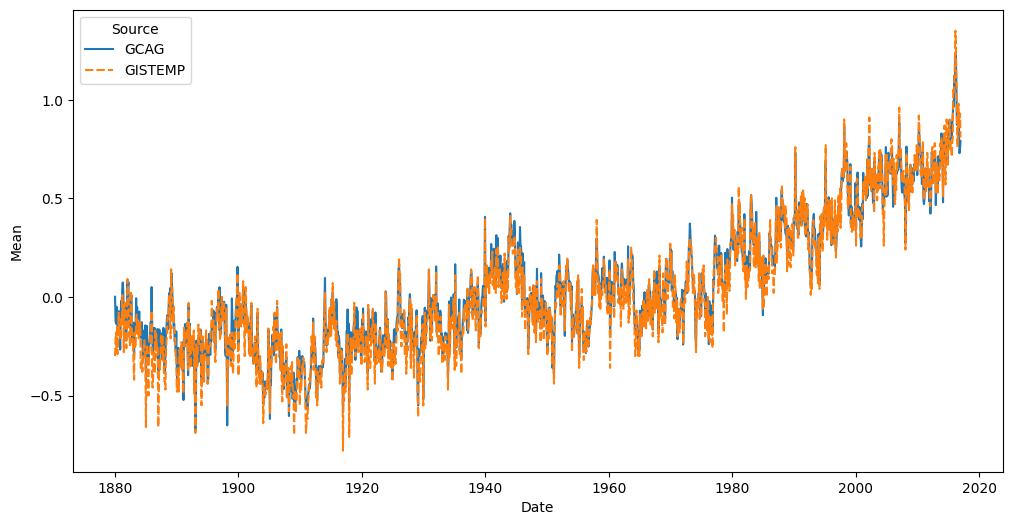

In [15]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=temperatures)
plt.ylabel('Mean');

## Trend and seasonality function using Polyfit

In [ ]:
from numpy import polyfit
import numpy as np

def fit(X, y, degree=3):
    coef = polyfit(X, y, degree)
    trendpoly = np.poly1d(coef)
    return trendpoly(X)

def get_season(s, yearly_periods=4, degree=3):
    X = [i%(365/4) for i in range(0, len(s))]
    seasonal = fit(X, s.values, degree)
    return pd.Series(data=seasonal, index=s.index)

def get_trend(s, degree=3):
    X = list(range(len(s)))
    trend = fit(X, s.values, degree)
    return pd.Series(data=trend, index=s.index)

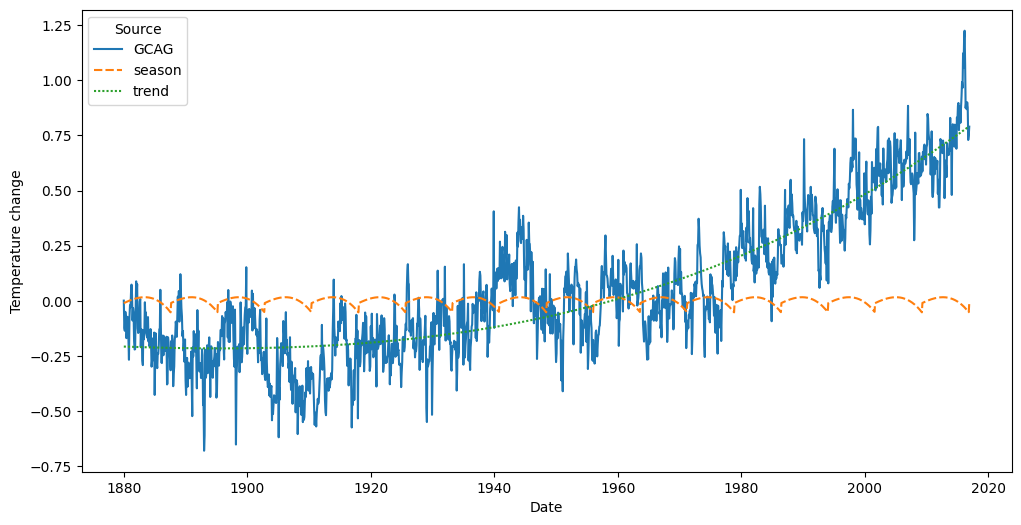

In [19]:
plt.figure(figsize=(12, 6))
temperatures['trend'] = get_trend(temperatures['GCAG'])
temperatures['season'] = get_season(temperatures['GCAG'] - temperatures['trend'])
sns.lineplot(data=temperatures[['GCAG', 'season', 'trend']])
plt.ylabel('Temperature change');

In [20]:
temperatures.head()

Source,GCAG,GISTEMP,trend,season
Date,,,,
1880-01-06,0.0009,-0.30,-0.207448,-0.010461
1880-02-06,-0.1229,-0.21,-0.207531,-0.009336
1880-03-06,-0.1357,-0.18,-0.207613,-0.008226
1880-04-06,-0.0499,-0.27,-0.207695,-0.007131
1880-05-06,-0.0738,-0.14,-0.207777,-0.006051
